In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
#Set the working directory

os.chdir("D:/Project_2")
os.getcwd()

'D:\\Project_2'

In [3]:
bike_data = pd.read_csv("day.csv", encoding = 'ISO - 8859 -1')

In [4]:
bike_data.shape

(731, 16)

In [5]:
#Check for missing value
bike_data.isnull().sum()

#The data set does not contain any missing value

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
bike_data.info()

# Convert the required data type 

In [6]:
#Convert into category
for col in ['season','yr','mnth','holiday','weekday','workingday','weathersit']:
        bike_data[col] = bike_data[col].astype('object')
        

In [7]:
#Convert into Numericals

for col in ['instant','temp','atemp','hum','windspeed','casual','registered','cnt']:
        bike_data[col] = bike_data[col].astype('float')         

In [8]:
from datetime import datetime

In [9]:
 bike_data['dteday'].apply(str)

0      2011-01-01
1      2011-01-02
2      2011-01-03
3      2011-01-04
4      2011-01-05
5      2011-01-06
6      2011-01-07
7      2011-01-08
8      2011-01-09
9      2011-01-10
10     2011-01-11
11     2011-01-12
12     2011-01-13
13     2011-01-14
14     2011-01-15
15     2011-01-16
16     2011-01-17
17     2011-01-18
18     2011-01-19
19     2011-01-20
20     2011-01-21
21     2011-01-22
22     2011-01-23
23     2011-01-24
24     2011-01-25
25     2011-01-26
26     2011-01-27
27     2011-01-28
28     2011-01-29
29     2011-01-30
          ...    
701    2012-12-02
702    2012-12-03
703    2012-12-04
704    2012-12-05
705    2012-12-06
706    2012-12-07
707    2012-12-08
708    2012-12-09
709    2012-12-10
710    2012-12-11
711    2012-12-12
712    2012-12-13
713    2012-12-14
714    2012-12-15
715    2012-12-16
716    2012-12-17
717    2012-12-18
718    2012-12-19
719    2012-12-20
720    2012-12-21
721    2012-12-22
722    2012-12-23
723    2012-12-24
724    2012-12-25
725    201

In [10]:
#Convetr the Date variable

#bike_data['dteday'] = bike_data['dteday'].astype('Date')

bike_data['dteday'] = pd.to_datetime(bike_data['dteday'])


# Check for missing values

In [11]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
#There is no missing value present in the given dataset

# Outlier Analysis

In [12]:
cnames = ["instant","temp","atemp","hum","windspeed","casual","registered","cnt"]

In [13]:
#Select and Remove the outliers

for i in cnames:
    q75 , q25 = np.percentile(bike_data.loc[:,i],[75,25])
    iqr = q75  -  q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    
    print(min)
    print(max)
    
    bike_data = bike_data.drop(bike_data[bike_data.loc[:,i] < min].index)
    bike_data = bike_data.drop(bike_data[bike_data.loc[:,i] > max].index)

-364.0
1096.0
-0.14041600000000015
1.1329160000000003
-0.06829675000000018
1.0147412500000002
0.20468725
1.0455212500000002
-0.012431000000000025
0.380585
-885.0
2323.0
-840.0
8018.0
-788.125
9500.875


In [14]:
print(min)

-788.125


In [15]:
print(max)

9500.875


In [16]:
bike_data.shape

(676, 16)

In [ ]:
#731-676

#55 observations got deleted

# Feature Selection

In [17]:
corr_plot = bike_data.loc[:,cnames]
corr_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 0 to 730
Data columns (total 8 columns):
instant       676 non-null float64
temp          676 non-null float64
atemp         676 non-null float64
hum           676 non-null float64
windspeed     676 non-null float64
casual        676 non-null float64
registered    676 non-null float64
cnt           676 non-null float64
dtypes: float64(8)
memory usage: 47.5 KB


In [18]:
import seaborn as sns

In [19]:
%matplotlib inline

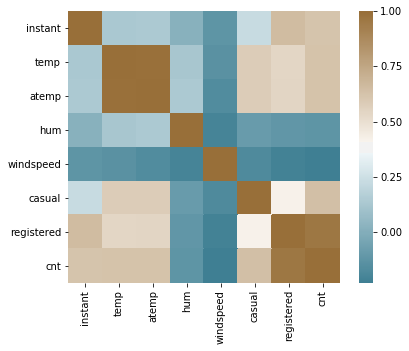

In [20]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7,5))

#Generate Correlation Matrix

corr = corr_plot.corr()

#plot using seaborn library


sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 50, as_cmap=True),square=True, ax=ax)


In [21]:
#temp and atemp can be observed as they are highly correlated
#Thus we need to drop one of them
#Temp is the actual temperature whereas atemp is the feeling value of temperature
#Feeling temperature is more impprtant when it comes to real life


#Also casual, registered and cnt are positively correlated
#Moreover sum of casual and registered forms cnt variable

In [22]:
#get variable names 
bike_data.columns.values

array(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'], dtype=object)

In [23]:
bike_data = bike_data.drop(["instant","casual","registered","temp","dteday"],axis = 1)

In [24]:
bike_data.columns.values

array(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'], dtype=object)

In [25]:
#Till here, our features are selected and they are already normalized.
# We don't need to perform feature scaling
bike_data.to_csv("Clean_bike_data_python.csv",sep="\t")

# Regression Model Development 

In [ ]:
#__ Decision Tree Model ________

In [27]:
from random import randrange, uniform

In [28]:
import sklearn

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
bike_data = bike_data.drop(["dteday"],axis=1)

In [36]:
#Divide the data into two part for training the model and testing the model

x = bike_data.values[:, 0:10]
y = bike_data.values[:,10]
y = y.astype('int')

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2)

In [33]:
from sklearn import tree

In [39]:
import numpy as np

In [37]:
c50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)



In [50]:
#predict new test cases
C50_Predictions = C50_model.predict(x_test)


In [ ]:
#Create a definition of RMSLE error coefficient

In [54]:
def rmsle(target, predicted):
    log1 = np.nan_to_num(np.array([np.log(v+1) for v in target]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in predicted]))
    calc = (log1 - log2) **2
    return np.sqrt(np.mean(calc))

In [57]:
print("RMSLE Value :", rmsle(y_test,C50_Predictions))

RMSLE Value : 0.5659324062951675


In [ ]:
##______ RANDOM FOREST MODEL _______

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 20).fit(x_train, y_train)

In [ ]:
#Predict values using Random Forest Model

In [43]:
rf_predictions = rf_model.predict(x_test)

In [58]:
#Check RMSLE error coefficient

print("RMSLE Value: ", rmsle(y_test,rf_predictions))

RMSLE Value:  0.3818462350216115
